## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [19]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [20]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
from keras.layers import Dropout
def build_mlp(input_shape,output_units=10,num_neurons=[256,128,64,64],drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units,activation='relu',
                                   name=f'hidden_layer{i+1}')(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',
                                   name=f'hidden_layer{i+1}')(input_layer)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units,activation='softmax',
                                   name=f'output_layer')(x)

    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [26]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
DROP_RATIOS = [0.1,0.3,0.5]

In [29]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp_ratio in DROP_RATIOS:
    model = build_mlp(input_shape = x_train.shape[1:],drp_ratio=drp_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),shuffle=True)
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    results[f'{drp_ratio}'] = {'train_loss':train_loss,'valid_loss':valid_loss,
                               'train_acc':train_acc,'valid_acc':valid_acc}

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                196672    
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 39us/step - loss: 2.0623 - accuracy: 0.2464 - val_loss: 1.8932 - val_accuracy: 0.3311
Epoch 2/30
50000/50000 [==============================

Epoch 14/30
50000/50000 [==============================] - 2s 34us/step - loss: 1.9079 - accuracy: 0.2980 - val_loss: 1.7930 - val_accuracy: 0.3646
Epoch 15/30
50000/50000 [==============================] - 2s 33us/step - loss: 1.9072 - accuracy: 0.2967 - val_loss: 1.7770 - val_accuracy: 0.3711
Epoch 16/30
50000/50000 [==============================] - 2s 36us/step - loss: 1.9011 - accuracy: 0.2997 - val_loss: 1.8003 - val_accuracy: 0.3671
Epoch 17/30
50000/50000 [==============================] - 2s 31us/step - loss: 1.8940 - accuracy: 0.3031 - val_loss: 1.7864 - val_accuracy: 0.3694
Epoch 18/30
50000/50000 [==============================] - 1s 29us/step - loss: 1.8924 - accuracy: 0.3045 - val_loss: 1.7768 - val_accuracy: 0.3603
Epoch 19/30
50000/50000 [==============================] - 2s 30us/step - loss: 1.8880 - accuracy: 0.3048 - val_loss: 1.7890 - val_accuracy: 0.3734
Epoch 20/30
50000/50000 [==============================] - 1s 29us/step - loss: 1.8845 - accuracy: 0.3082 - val_

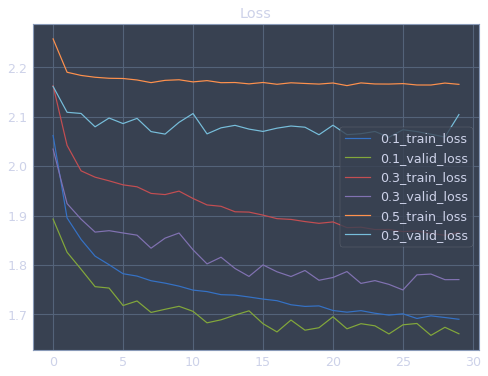

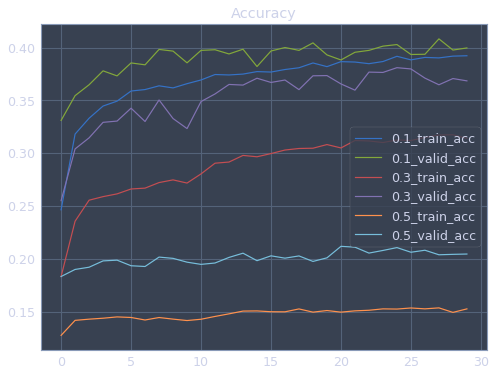

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.figure(figsize=(8,6))
for drp_ratio in results.keys():
    plt.plot(range(len(results[drp_ratio]['train_loss'])),
             results[drp_ratio]['train_loss'],label=f'{drp_ratio}_train_loss')
    plt.plot(range(len(results[drp_ratio]['valid_loss'])),
             results[drp_ratio]['valid_loss'],label=f'{drp_ratio}_valid_loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.figure(figsize=(8,6))
for drp_ratio in results.keys():
    plt.plot(range(len(results[drp_ratio]['train_acc'])),
             results[drp_ratio]['train_acc'],label=f'{drp_ratio}_train_acc')
    plt.plot(range(len(results[drp_ratio]['valid_acc'])),
             results[drp_ratio]['valid_acc'],label=f'{drp_ratio}_valid_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [31]:
!jupyter nbconvert --to html Day_082_HW.ipynb Day_082_Dropout.ipynb

[NbConvertApp] Converting notebook Day_082_HW.ipynb to html
[NbConvertApp] Writing 489852 bytes to Day_082_HW.html
[NbConvertApp] Converting notebook Day_082_Dropout.ipynb to html
[NbConvertApp] Writing 415645 bytes to Day_082_Dropout.html
